# Visualize with tsne

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import matplotlib, random
%matplotlib inline

In [2]:
doctopicpath = '../fic50/fic50_vols.tsv'

samples = []
labels = []

with open(doctopicpath, encoding = 'utf-8') as f:
    for line in f:
        fields = line.strip().split('\t')
        charid = fields[1]
        vector = np.array(fields[2 : ], dtype = 'float32')    
        samples.append(vector)
        labels.append(charid)

samples = np.array(samples)
samples.shape

(2760, 50)

In [3]:
visualizer = TSNE(init = "pca", perplexity = 15)

In [4]:
newarray = visualizer.fit_transform(samples)

In [5]:
newarray.shape

(2760, 2)

In [6]:
x = newarray[ : , 0]
y = newarray[ : , 1]

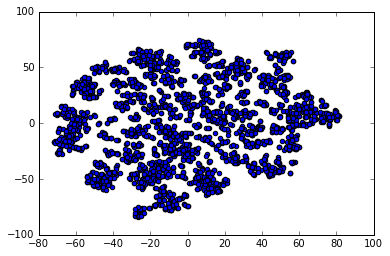

In [7]:
plt.scatter(x, y)
plt.show()

In [8]:
meta = pd.read_csv('../../metadata/filtered_fiction_plus_18c.tsv', sep = '\t', index_col = 'docid')
meta = meta[~meta.index.duplicated(keep = 'first')]

In [9]:
labelcolors = []

for charid in labels:
    doc = charid.split('|')[0]
    date = meta.loc[doc, 'inferreddate']
    labelcolors.append(date)

minimum = min(labelcolors)
maximum = max(labelcolors)
labelcolors = np.array(labelcolors)
labelcolors = (labelcolors - minimum) / (maximum - minimum)

In [10]:
docdict = dict()
maxnum = 0
labelcolors = []

for charid in labels:
    doc = charid.split('|')[0]
    if doc not in docdict:
        docdict[doc] = random.uniform(0, 1)
        labelcolors.append(docdict[doc])
    else:
        labelcolors.append(docdict[doc])

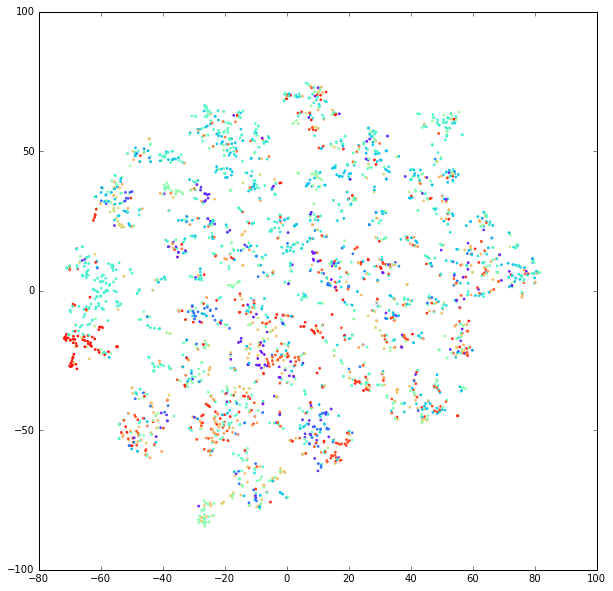

In [13]:
plt.figure(figsize=(10,10))
cmap = plt.cm.rainbow
# norm = matplotlib.colors.Normalize(vmin=1.5, vmax=4.5)
plt.scatter(x, y, color = cmap(labelcolors), s = 3)

In [14]:
doctopicpath = '../biofic50/biofic50_viz.tsv'

biofic = []
biolabels = []

with open(doctopicpath, encoding = 'utf-8') as f:
    for line in f:
        fields = line.strip().split('\t')
        charid = fields[1]
        vector = np.array(fields[2 : ], dtype = 'float32')    
        biofic.append(vector)
        biolabels.append(charid)

biofic = np.array(biofic)
biofic.shape

(4116, 50)

In [15]:
tsnetransformer = TSNE(perplexity = 40, init = 'pca')

In [16]:
bioarray = visualizer.fit_transform(biofic)

In [88]:
labeldict = dict()

detectives = {'11031|Holmes', '11594|Holmes', 
              'mdp.39015001153629|Poirot', 'mdp.39015061868363|MissMarple',
             'inu.30000007060282|Wimsey', 'mdp.39015003474866|Spade', 
              'uc1.$b808866|Ed'}

historical = {'12985|Diana', '12449|Flora', '5854|Rowena', '12449|MissBradwardine', '5854|Rebecca',
             'osu.32435083797019|Venetia', 'mdp.39015047606440|Serena'}

dudectr = 0
galctr = 0
otherctr = 0

with open('../dataprep/biofic2take.tsv', encoding = 'utf-8') as f:
    for line in f:
        
        fields = line.strip().split('\t')
        charid = fields[0]
        label = fields[1]
        date = int(label[3:7])
        alpha = (date - 1000) / 1100
        
        if label.endswith('f'):
            shape = 'v'
            galctr += 1
        elif label.endswith('m'):
            shape = 'o'
            dudectr += 1
        else:
            shape = 's'
            otherctr += 1
            
        if charid in detectives:
            labeldict[charid] = ('b', alpha, shape)
        elif charid in historical:
            labeldict[charid] = ('g', alpha, shape)
        elif label.startswith('bio') and date < 1900:
            labeldict[charid] = ('k', alpha, shape)
        elif label.startswith('bio'):
            labeldict[charid] = ('k', alpha, shape)
        elif label.startswith('fic') and date < 1900:
            labeldict[charid] = ('r', alpha, shape)
        else:
            labeldict[charid] = ('r', alpha, shape)

dudecolors = np.zeros((dudectr, 4))
dudesizes = []
galcolors = np.zeros((galctr, 4))
galsizes = []
othercolors = np.zeros((otherctr, 4))
othersizes = []

x = bioarray[ : , 0]
y = bioarray[ : , 1]

dudex = []
galx = []
otherx = []
dudey = []
galy = []
othery = []

dudectr = 0
galctr = 0
otherctr = 0

for idx, l in enumerate(biolabels):
    color, alpha, shape = labeldict[l]
    if shape == 's':
        if color == 'r':
            othercolors[otherctr, 0] = 1
        elif color == 'b':
            othercolors[otherctr, 2] = 1
        
        if color == 'b':
            othersizes.append(27)
        else:
            othersizes.append(7)
        
        othercolors[otherctr, 3] = alpha
        otherctr += 1
        
        otherx.append(x[idx])
        othery.append(y[idx])
    
    if shape == 'v':
        if color == 'r':
            galcolors[galctr, 0] = 1
            galcolors[galctr, 2] = .4
        elif color == 'b':
            galcolors[galctr, 2] = 1
        elif color == 'g':
            galcolors[galctr, 1] = 1
        else:
            galcolors[galctr, 2] = .4
        
        if color == 'b' or color == 'g':
            galsizes.append(27)
        else:
            galsizes.append(7)
        
        galcolors[galctr, 3] = alpha
        galctr += 1
        
        galx.append(x[idx])
        galy.append(y[idx])
    
    if shape == 'o':
        if color == 'r':
            dudecolors[dudectr, 0] = 1
        elif color == 'b':
            dudecolors[dudectr, 2] = 1
        
        if color == 'b':
            dudesizes.append(27)
        else:
            dudesizes.append(7)
        
        dudecolors[dudectr, 3] = alpha
        dudectr += 1
        
        dudex.append(x[idx])
        dudey.append(y[idx])
    

In [80]:
labeldict = dict()

detectives = {'11031|Holmes', '11594|Holmes', 
              'mdp.39015001153629|Poirot', 'mdp.39015061868363|MissMarple',
             'inu.30000007060282|Wimsey', 'mdp.39015003474866|Spade', 
              'uc1.$b808866|Ed'}

historical = {'12985|Diana', '12449|Flora', '5854|Rowena', '12449|MissBradwardine', '5854|Rebecca',
             '10651|Elizabeth', '1516|Elinor', '10651|Mrs.Bennet'}

ctr = 0
with open('../dataprep/biofic2take.tsv', encoding = 'utf-8') as f:
    for line in f:
        ctr += 1
        fields = line.strip().split('\t')
        charid = fields[0]
        label = fields[1]
        date = int(label[3:7])
        alpha = (date - 1750) / 260
        if charid in detectives:
            labeldict[charid] = ('b', alpha)
        elif charid in historical:
            labeldict[charid] = ('g', alpha)
        elif label.endswith('f'):
            labeldict[charid] = ('r', alpha)
        elif label.endswith('m') and label.startswith('bio'):
            labeldict[charid] = ('g', alpha)
        elif label.endswith('m') and label.startswith('fic'):
            labeldict[charid] = ('c', alpha)
        else:
            labeldict[charid] = ('k', alpha)
            
labelcolors = np.zeros((ctr, 4))
labelsizes = []

for idx, l in enumerate(biolabels):
    color, alpha = labeldict[l]
    if color == 'r':
        labelcolors[idx, 0] = 1
    elif color == 'b':
        labelcolors[idx, 2] = 1
    elif color == 'g':
        labelcolors[idx, 1] = 1
    elif color == 'c':
        labelcolors[idx, 1] = 0.5
        labelcolors[idx, 2] = 0.5
    
    labelcolors[idx, 3] = alpha
        
    if color == 'b':
        labelsizes.append(25)
    else:
        labelsizes.append(2)

In [89]:
galx = np.array(galx, ndmin = 2)
galy = np.array(galy, ndmin = 2)
dudex = np.array(dudex, ndmin = 2)
dudey = np.array(dudey, ndmin = 2)
otherx = np.array(otherx, ndmin = 2)
othery = np.array(othery, ndmin = 2)

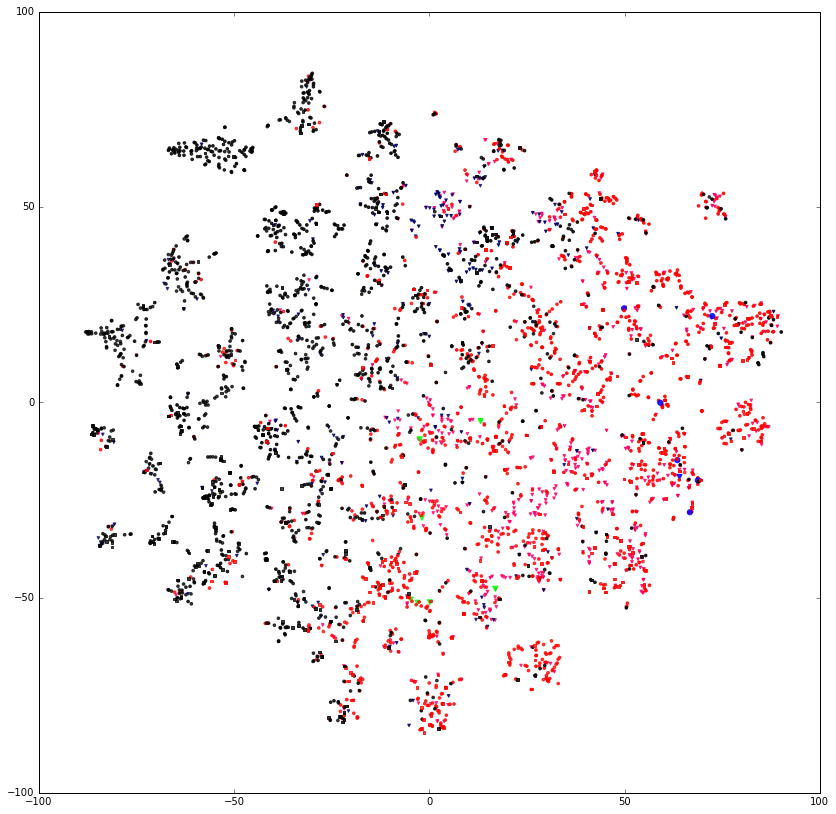

In [90]:
plt.figure(figsize=(14, 14))
plt.scatter(galx, galy, color = galcolors, s = galsizes, marker = "v")
plt.scatter(dudex, dudey, color = dudecolors, s = dudesizes, marker = "o")
plt.scatter(otherx, othery, color = othercolors, s = othersizes, marker = "s")
plt.show()

In [92]:
from scipy.spatial.distance import cosine

numrows = biofic.shape[0]
distmat = np.array([np.zeros(numrows) for x in range(numrows)])
for i in range(numrows):
    if i % 100 == 1:
        print(i)
    for j in range(i + 1, numrows):
        distance = cosine(biofic[i, : ], biofic[j, : ])
        distmat[i, j] = distance
        distmat[j, i] = distance
print(distmat.shape)

1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
(4116, 4116)


In [99]:
from sklearn.manifold import MDS
mdsviz = MDS(dissimilarity = 'precomputed')
biomds = mdsviz.fit_transform(distmat)

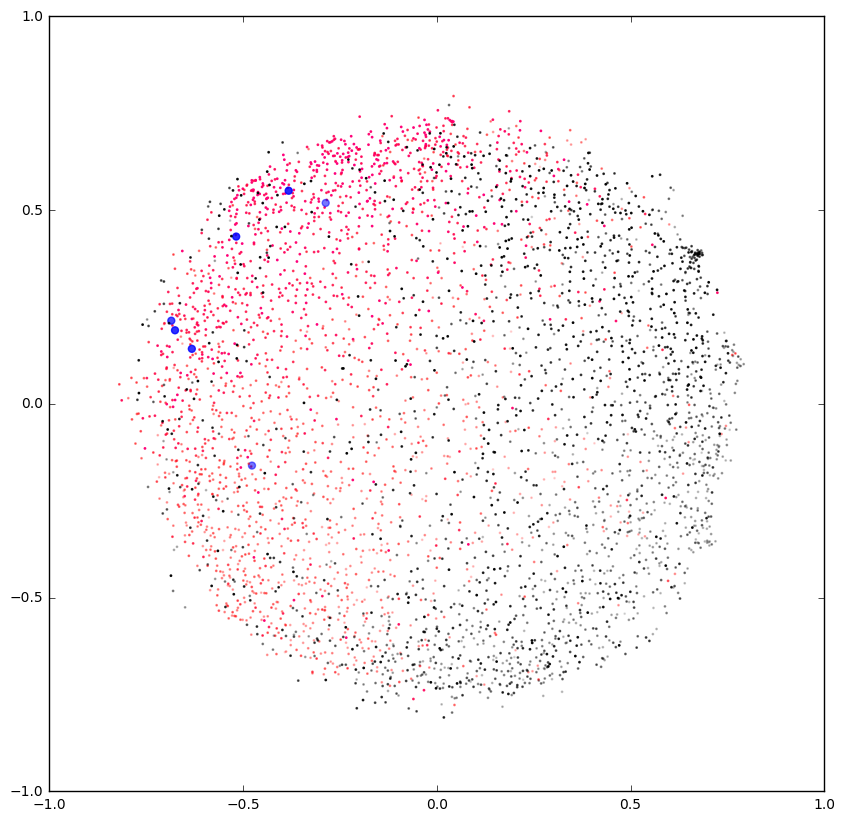

In [100]:
x = biomds[ : , 0]
y = biomds[ : , 1]

plt.figure(figsize=(10,10))
plt.scatter(x, y, color = labelcolors, s = labelsizes)
plt.show()